In [1]:
# Uvoz potrebnih biblioteka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id="ch3"></a>
## **Razumijevanje podataka**
<hr/>

In [2]:
#ucitala san samo dataset tako da se mogu raditi transformacije i analize

df = pd.read_csv('eshop.csv', index_col=0, delimiter=';')

#Prikaz prvih nekoliko redaka skupa podataka
display(df.head())

,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
year,,,,,,,,,,,,,
2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


**Opis skupa podataka**

In [3]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 165474 entries, 2008 to 2008
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   month                    165474 non-null  int64 
 1   day                      165474 non-null  int64 
 2   order                    165474 non-null  int64 
 3   country                  165474 non-null  int64 
 4   session ID               165474 non-null  int64 
 5   page 1 (main category)   165474 non-null  int64 
 6   page 2 (clothing model)  165474 non-null  object
 7   colour                   165474 non-null  int64 
 8   location                 165474 non-null  int64 
 9   model photography        165474 non-null  int64 
 10  price                    165474 non-null  int64 
 11  price 2                  165474 non-null  int64 
 12  page                     165474 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 17.7+ MB


Koristeći info() metodu, saznajemo da se skup podataka sastoji od 13 stupaca (atributa/značajki) i 165474 redova (instanci). Dvanaest značajki je u obliku cijelih brojeva (int64), a jedna značajka je kategorijska (object). Također možemo zaključiti da ne nedostaju vrijednosti ni u jednom stupcu podataka (165474 nije null za sve stupce skupa podataka).

In [4]:
df.describe()

,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


Koristeći `describe()` metodu, saznajemo osnovne statističke informacije za svaki numerički (int64) stupac: count (broj vrijednosti koje nisu nula u svakom stupcu), mean (prosječna vrijednost za stupac),
std (standardna devijacija), min (minimalna vrijednost u stupcu), 25% (1. kvartal), 50% (medijan ili 2. kvartal), 75% (3. kvartal), max (maksimalna vrijednost u stupcu).

Ako želimo dobiti ove informacije i za object varijable (koje su obično tekstualne ili kategorijske varijable), tada dodajemo `include='object'` ili `include='category'`  parametar i dobivamo sljedeće informacije: count (broj vrijednosti koje nisu nula u svakom stupcu), unique (broj jedinstvenih vrijednosti), top (najčešće pojavljujuća vrijednost, tzv. mod), freq (učestalost pojavljivanja najčešće vrijednosti).

In [5]:
df.describe()
# kategorijske
categorical_vars = ['day','month','page 1 (main category)', 'colour', 'location', 'model photography', 'country', 'page 2 (clothing model)', 'price 2', 'session ID']

# numeričke
numerical_vars = ['order', 'price', 'page']
df_numerical = df[numerical_vars]
df_categorical = df[categorical_vars]




Varijable su podijeljene na kategorijske i numeričke. Kategorijske su:

*   day
*   month
*   page 1(main category)
*   colour
*   location
*   model photography
*   country
*   page 2 (clothing model)
*   price 2
*   session ID

Numeričke preostaju: order, price i page.


**Vizualizacija**

<Axes: xlabel='month', ylabel='Count'>

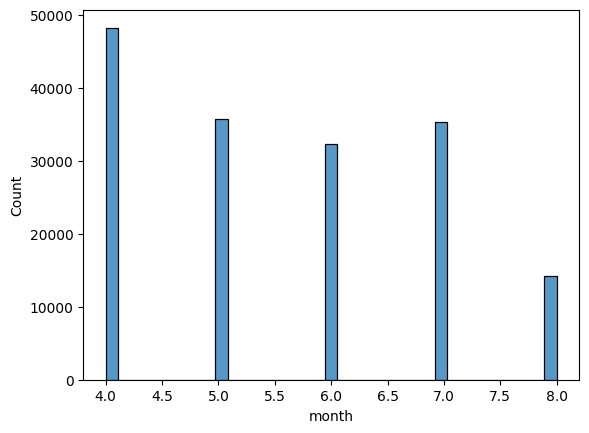

In [6]:
# Histogram za numeričku varijablu 'month'
sns.histplot(df['month'])

Što možemo zaključiti iz ovog histograma?

* U četvrtom mjesecu (4) vidimo najveću visinu trake, što znači da je u travnju bio najveći broj posjeta ili aktivnosti u e-trgovini. U svibnju (5) i lipnju (6)nakon travanjskog vrhunca, broj posjeta opada. U srpnju (7) dolazi do blagog oporavka i porasta broja posjeta u odnosu na lipanj. U kolovozu (8) ponovno dolazi do pada broja posjeta, koji je niži nego u srpnju, ali još uvijek značajan.
* Općenito, histogram za 'month' sugerira sezonski obrazac u podacima, s vrhuncem aktivnosti u travnju i varijacijama u ostalim mjesecima. Također, primjećujemo da podaci pokrivaju razdoblje od travnja do kolovoza, a raspodjela nije simetrična, već je nagnuta udesno (skewed right), s dužim "repom" prema kasnijim mjesecima.
Dakle:
* Podaci imaju asimetričnu distribuciju s naglaskom na desno nagnute.
* Nema ekstremnih vrijednosti



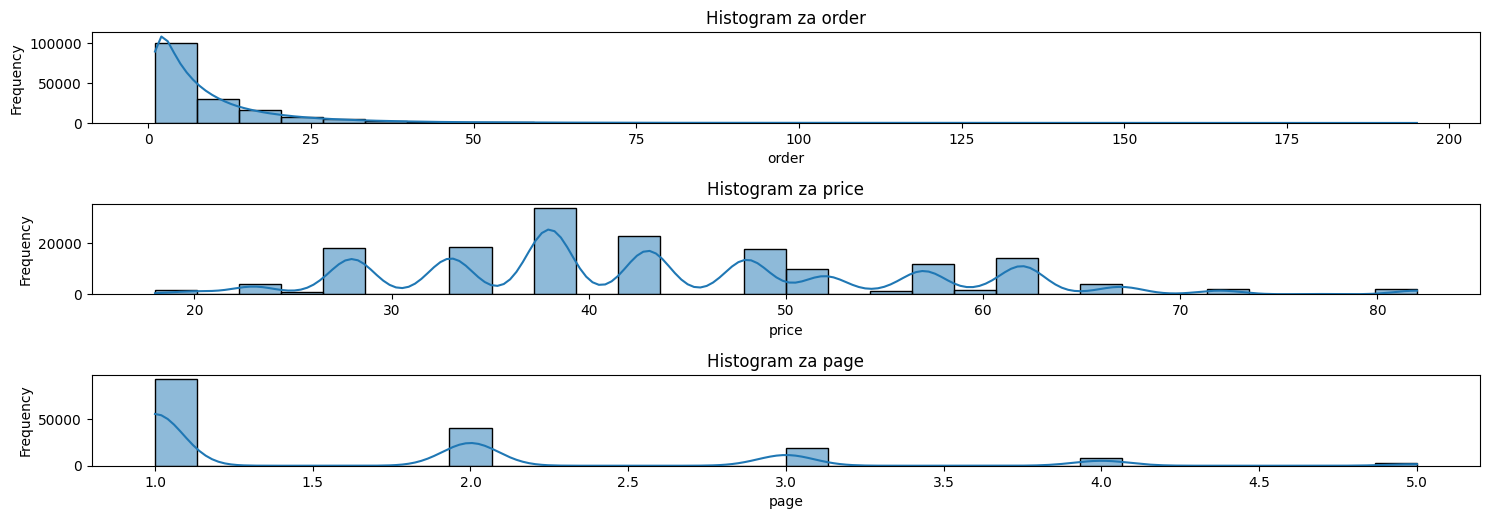

In [7]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_vars):
    plt.subplot(6, 1, i+1)
    sns.histplot(df[feature], bins=30, kde=True) # Iscrtavanje histograma za svaku numeričku značajku
    plt.title(f'Histogram za {feature}') # Postavljanje naslova za svaki histogram sa nazivom trenutne značajke
    plt.xlabel(feature) # Postavljanje oznake X ose na ime značajke
    plt.ylabel('Frequency') # Postavljanje oznake Y osi kao 'Frequency' (frekvencija pojavljivanja)

plt.tight_layout()
plt.show()

Na temelju histograma koje smo kreirali, možemo primijetiti sljedeće:


**order**: Ovaj histogram pokazuje da većina sesija ima mali broj pregledanih stranica (narudžbi), dok je vrlo malo sesija s velikim brojem pregledanih stranica. Ovo je tipična raspodjela gdje mali broj korisnika pregledava mnogo stranica, a većina samo nekoliko.

**price**: Raspodjela cijena pokazuje raspon cijena proizvoda. Možemo vidjeti najčešće cjenovne rangove i ima li ekstremno skupih ili jeftinih proizvoda.

**page**: Ovaj histogram prikazuje broj pregledanih stranica unutar sesije. Slično kao i order, vidimo da većina sesija uključuje pregled malog broja stranica.

Općenito, histogrami nam daju brzi uvid u to kako su podaci distribuirani za svaku numeričku varijablu i pomažu identificirati obrasce, koncentracije podataka i potencijalne anomalije.

Prikazani histogrami su asimetrične distribucije s iznimkom **page** i **order** koji su s naglaskom na desno nagnute.

Ekstremna vrijednost se pojavljuje u histogramu **country** gdje dominira jedna zemlja.

Atributi imaju različite skale.

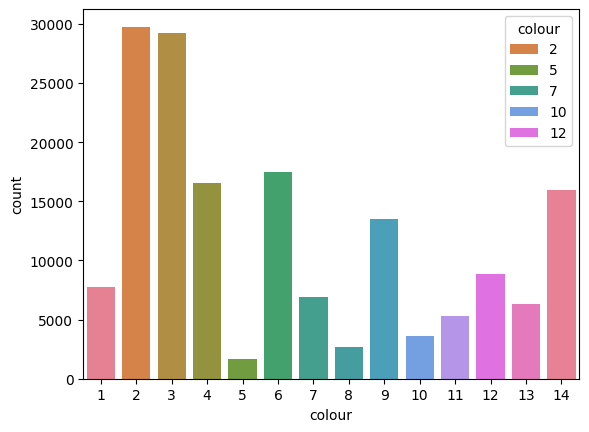

In [8]:
sns.countplot(x='colour', data=df_categorical, hue='colour', palette='husl')
plt.show()

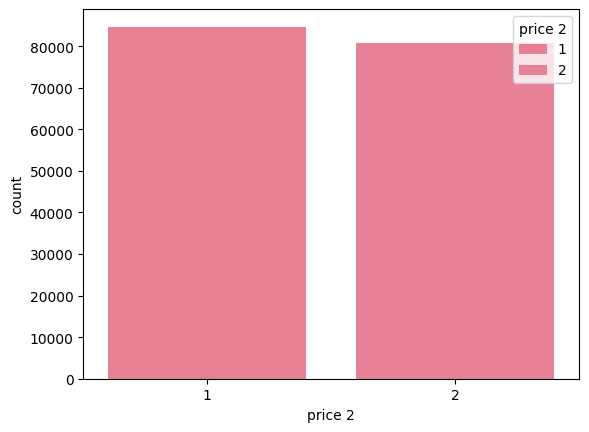

In [9]:
sns.countplot(x='price 2', data=df_categorical, hue='price 2', palette='husl')
plt.show()

Što se tiče kategorijskih varijabli za pojedine (price 2, colour) su napravljeni count plotovi iz kojih se može očitati koliko je koja kategorija učestala u skupu podataka.

In [10]:
# Izračunavanje matrice korelacije za numeričke varijable
correlation_matrix = df_numerical.corr(numeric_only=True)

# Prikaz matrice korelacije
display(correlation_matrix)

,order,price,page
order,1.000000,-0.064779,0.204106
price,-0.064779,1.000000,-0.150455
page,0.204106,-0.150455,1.000000



Matrica korelacije prikazuje koeficijente korelacije između parova numeričkih varijabli. Vrijednosti se kreću od -1 do 1, gdje:
- Vrijednost blizu 1 označava snažnu pozitivnu linearnu korelaciju (kada jedna varijabla raste, raste i druga).
- Vrijednost blizu -1 označava snažnu negativnu linearnu korelaciju (kada jedna varijabla raste, druga opada).
- Vrijednost blizu 0 označava slabu ili nikakvu linearnu korelaciju.

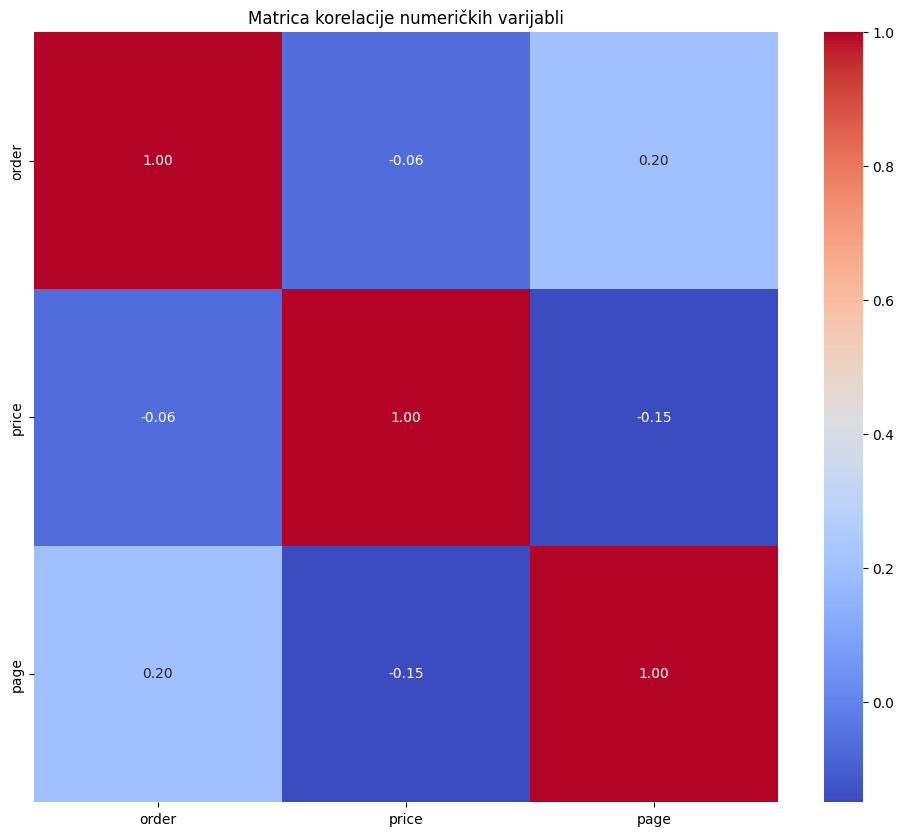

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vizualizacija matrice korelacije pomoću heatmap-a
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrica korelacije numeričkih varijabli')
plt.show()

Prema matrici korelacije za numeričke varijable možemo zaključiti da varijable order i page imaju blagu pozitivnu korelaciju. Price i order imaju blagu negativnu korelaciju, dok price i page imaju jaku negativnu korelaciju.

Heatmap matrice korelacije vizualno prikazuje snagu i smjer korelacije između varijabli. Svaka ćelija prikazuje koeficijent korelacije, a boja označava snagu i smjer (crvena za pozitivnu, plava za negativnu korelaciju, intenzitet boje za snagu).

Na temelju prikazane matrice korelacije i heatmap-a, možemo analizirati odnose između pojedinih parova varijabli. Visoke pozitivne ili negativne vrijednosti korelacije identificiraju jake linearne odnose. Na primjer, ako postoji visoka korelacija između "price" i "price 2", to bi značilo da su te dvije varijable usko povezane.

Za detaljniju analizu odnosa između specifičnih parova varijabli s potencijalno zanimljivom korelacijom, možemo koristiti dijagrame raspršenja (scatter plot).

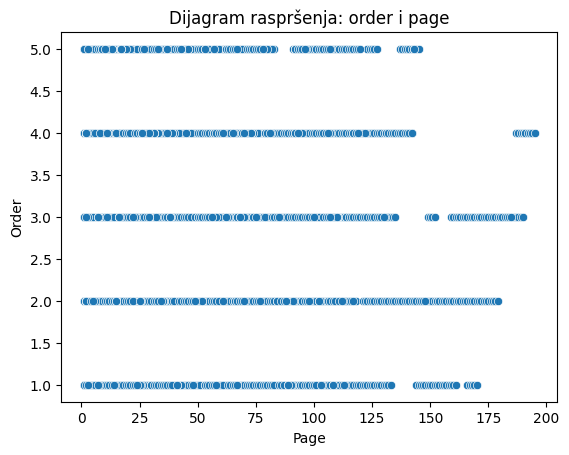

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Primjer dijagrama raspršenja za dvije varijable s potencijalnom korelacijom ('order' i 'page')

sns.scatterplot(x='order', y='page', data=df)
plt.title('Dijagram raspršenja: order i page')
plt.xlabel('Page')
plt.ylabel('Order')
plt.show()

Postoji blaga korelacija između varijabli order (koja predstavlja broj klikova) te varijable page koja je u biti broj stranice. Iz dijagrama vidiomo koliko je kilikova po kojoj stranici.

**Analiza ekstremnih vrijednosti u 'price' i 'price 2' pomoću Box Plotova**

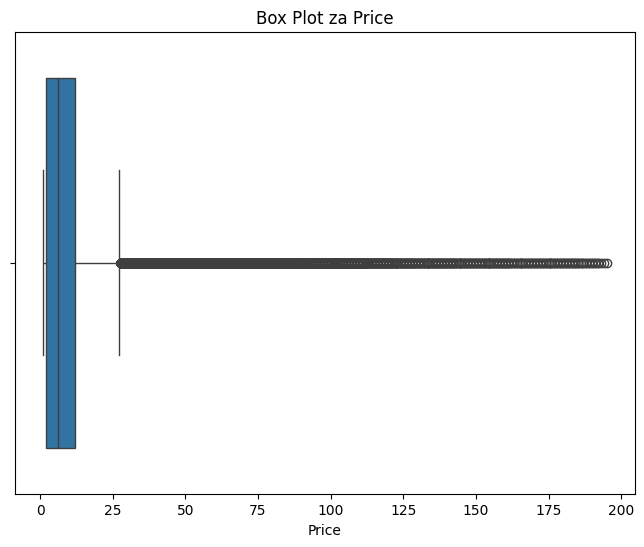

In [13]:
# Box plot za 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['order'])
plt.title('Box Plot za Price')
plt.xlabel('Price')
plt.show()

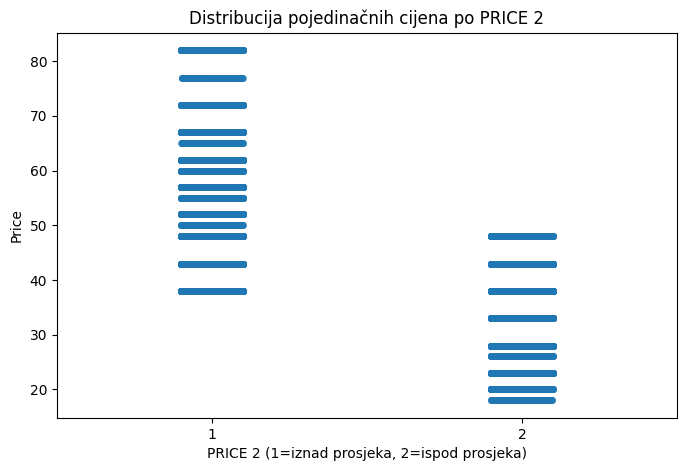

In [14]:
plt.figure(figsize=(8,5))
sns.stripplot(x='price 2', y='price', data=df, jitter=True, alpha=0.4)
plt.title('Distribucija pojedinačnih cijena po PRICE 2')
plt.xlabel('PRICE 2 (1=iznad prosjeka, 2=ispod prosjeka)')
plt.ylabel('Price')
plt.show()


**Interpretacija Box Plotova:**
Za varijablu price kutija predstavlja interkvartilni raspon od 25. do 75. percentila. Crta unutar kutije je medijan. Kutija je očigledno vrlo uska te se može zaključiti da je većina cijena niska. Postoji veliki broj outliera koji idu do 200 što ukazuje na asimetričnu raspodjelu cijena. Jako je pozitivno iskrivljen dijagram. Kako bismo bolje objasnili situaciju, radimo drugi box plot koji kombinira price i price 2 (koji govori je li cijena iznad ili ispod prosjeka kategorije). Svrha tog drugog boxplota je da smanji utjecaj stršila.


**Provjera i obrada nedostajućih vrijednosti, dupliciranih zapisa i ekstremnih vrijednosti**

In [15]:
# Provjera nedostajućih vrijednosti
missing_values = df.isnull().sum()
display("Nedostajuće vrijednosti po stupcima:", missing_values)

'Nedostajuće vrijednosti po stupcima:'

,0
month,0
day,0
order,0
country,0
session ID,0
page 1 (main category),0
page 2 (clothing model),0
colour,0
location,0
model photography,0


**Nedostajuće vrijednosti:**

Na temelju rezultata provjere, vidimo da u ovom skupu podataka **nema nedostajućih vrijednosti**. Svi stupci imaju 0 nedostajućih vrijednosti. Stoga, u koraku pripreme podataka, nećemo morati provoditi metode za popunjavanje ili uklanjanje nedostajućih vrijednosti.

In [16]:
# Provjera dupliciranih zapisa
duplicate_rows = df.duplicated().sum()
display("Broj dupliciranih zapisa:", duplicate_rows)

'Broj dupliciranih zapisa:'

np.int64(0)

**Duplicirani zapisi:**

Na temelju rezultata provjere, vidimo da u ovom skupu podataka postoji **0 dupliciranih zapisa**. Stoga, u koraku pripreme podataka, nećemo morati uklanjati duplicirane zapise.

**Ekstremne vrijednosti (Outliers):**

Ekstremne vrijednosti su točke podataka koje značajno odstupaju od ostalih vrijednosti u skupu podataka. Mogu nastati zbog pogrešaka pri unosu podataka, mjernih pogrešaka ili prirodnih varijacija. Prisutnost ekstremnih vrijednosti može utjecati na rezultate statističke analize i performanse modela strojnog učenja.

Metode za identifikaciju ekstremnih vrijednosti uključuju:
- **Vizualne metode:** Box plotovi, histogrami, dijagrami raspršenja.
- **Statističke metode:** Z-score, IQR (Interquartile Range).

Na temelju prethodno prikazanih histograma, primijetili smo potencijalne ekstremne vrijednosti u nekim numeričkim varijablama, poput 'order' i 'country' (gdje jedna zemlja dominira).

Postupci za obradu ekstremnih vrijednosti mogu uključivati:
- **Uklanjanje:** Uklanjanje redova koji sadrže ekstremne vrijednosti. Ovo je prikladno ako su ekstremne vrijednosti rezultat pogreške i čine mali dio skupa podataka.
- **Transformacija:** Primjena matematičkih transformacija (npr. logaritamska transformacija) kako bi se smanjio utjecaj ekstremnih vrijednosti.
- **Zamjena (Imputacija):** Zamjena ekstremnih vrijednosti s drugim vrijednostima, poput medijana ili prosjeka (iako to treba pažljivo razmotriti).
- **Modeliranje:** Korištenje modela koji su manje osjetljivi na ekstremne vrijednosti (npr. modeli temeljeni na stablima odlučivanja).

U koraku pripreme podataka, detaljnije ćemo analizirati varijable s potencijalnim ekstremnim vrijednostima koristeći box plotove i/ili statističke metode kako bismo potvrdili njihovu prisutnost i odlučili o najprikladnijoj metodi obrade za svaku varijablu.

## **Čišćenje podataka**

In [17]:
# uklanjanje dupliciranih zapisa
df = df.drop_duplicates()


# uklanjanje nepotrebnih stupaca

df = df.drop(['session ID', 'country', 'page 2 (clothing model)', 'day', 'colour', 'location'], axis=1)
df = df.reset_index()
df = df.drop('year', axis=1)



# imputacija nedostajućih vrijednosti (npr. sa srednjom vrijednosti)


Pošto ne postoje nekakve nepostojeće vrijednosti ne moram imputirati podatke. Također nema niti duplikata. Iz skupa uklanjam stupce 'session ID', 'location' te page 2 (clothing model)' pošto mi ne služe baš u procesu klasteriranja.


In [18]:
#pretvaram kategoričke varijable u numeričke da mogu klasterirati


df_encoded = pd.get_dummies(df, columns=['page 1 (main category)','month', 'price 2', 'model photography'], drop_first=True)


df_encoded.head()

,order,price,page,page 1 (main category)_2,page 1 (main category)_3,page 1 (main category)_4,month_5,month_6,month_7,month_8,price 2_2,model photography_2
0,1,28,1,False,False,False,False,False,False,False,True,False
1,2,33,1,False,False,False,False,False,False,False,True,False
2,3,52,1,True,False,False,False,False,False,False,False,False
3,4,38,1,True,False,False,False,False,False,False,True,True
4,5,52,1,True,False,False,False,False,False,False,False,True


In [19]:
#podatke skaliram
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
print(X_scaled)


[[-0.65419449 -1.25935522 -0.72288203 ... -0.3057671   1.02395212
  -0.59285845]
 [-0.58000155 -0.8608883  -0.72288203 ... -0.3057671   1.02395212
  -0.59285845]
 [-0.50580861  0.65328597 -0.72288203 ... -0.3057671  -0.97660816
  -0.59285845]
 ...
 [-0.65419449 -0.06395448 -0.72288203 ...  3.27046308  1.02395212
  -0.59285845]
 [-0.58000155 -0.06395448 -0.72288203 ...  3.27046308 -0.97660816
  -0.59285845]
 [-0.50580861  1.05175288 -0.72288203 ...  3.27046308 -0.97660816
   1.68674326]]


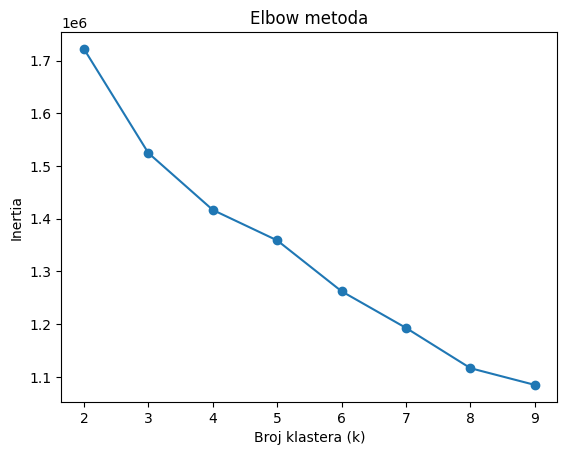

In [20]:
#pronalazenje optimalnog broja klastera pomocu elbow metode
from sklearn.cluster import KMeans
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Broj klastera (k)')
plt.ylabel('Inertia')
plt.title('Elbow metoda')
plt.show()

Vidljivo je na kojim se točkama lomi graf. Točka pregiba, odnosno "lakat" je 3. To znači da dodavanje više klastera značajno ne poboljšava model. 3 je optimalan broj klastera kako bi se dobile dovoljno razdvojene grupe za interpretaciju.


In [21]:
#klasteriranje
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Klaster'] = clusters


In [22]:
#evaluacija kvalitete klastera
from sklearn.metrics import silhouette_score

# Ispisivanje Silhouette ocjena
print(f'KMeans Silhouette score: {silhouette_score(X_scaled, clusters):.4f}')

KMeans Silhouette score: 0.1641


Silhoutte score je 0.164. To nije idealno jer je zapravo score jako nizak no prepisat ćemo to prirodi skupa podataka. Puno je kategorijskih i hijerarhijskih varijabli.

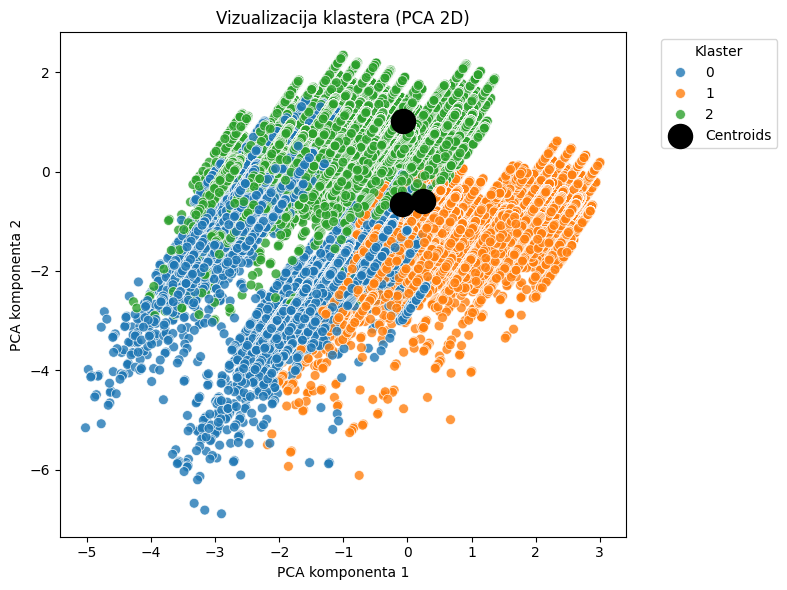

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#redukcija dimenzionalnosti
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

#crtanje
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df['Klaster'],
    palette='tab10',
    s=50,
    alpha=0.8
)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='Centroids')
plt.title('Vizualizacija klastera (PCA 2D)')
plt.xlabel('PCA komponenta 1')
plt.ylabel('PCA komponenta 2')
plt.legend(title='Klaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [24]:
# srednje vrijednosti po klasterima
cluster_summary = df.groupby("Klaster").mean(numeric_only=True)
display(cluster_summary)

# najčešće po klasterima
for col in ["page 1 (main category)", "price 2", "model photography"]:
    print(f"\nNajčešće vrijednosti za {col} po klasterima:")
    print(df.groupby("Klaster")[col].agg(lambda x: x.value_counts().index[0]))


,month,order,page 1 (main category),model photography,price,price 2,page
Klaster,,,,,,,
0,5.657758,13.162779,3.995546,1.418817,36.238787,1.458649,2.192312
1,5.570457,8.893812,2.078514,1.160311,56.599717,1.000000,1.555678
2,5.557158,8.688054,1.743147,1.263031,35.527586,2.000000,1.568990



Najčešće vrijednosti za page 1 (main category) po klasterima:
Klaster
0    4
1    2
2    1
Name: page 1 (main category), dtype: int64

Najčešće vrijednosti za price 2 po klasterima:
Klaster
0    1
1    1
2    2
Name: price 2, dtype: int64

Najčešće vrijednosti za model photography po klasterima:
Klaster
0    1
1    1
2    1
Name: model photography, dtype: int64


Klaster 0: Prema analizi prosječnih vrijednosti, možemo zaključiti da klaster 0 predstavlja korisnike s većim brojem klikova (order) te umjerenom cijenom. Glavna kategorija je 4, što označava rasprodaju.
Klaster 1: Ima niži broj klikova od broja 1 ali ima najviše prosječnu cijenu. Glavna kategorija je 2, odnosno suknje. To su korisnici koji plaćaju više, ali manje su aktivni.
Klaster 2: Sličan broj klikova kao klaster 0, ali ima nižu cijenu. Glavna kategorija su hlače, a price 2 varijabla nam govori da su proizvodi u prosječnom cjenovnom rangu. To us korisnici koji kupuju jeftine proizvode u osnovnim kategorijama.

